In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df_in = pd.read_csv('chicago_taxi.csv')
df_in.head()
df_in = df_in.sample(n=100000)

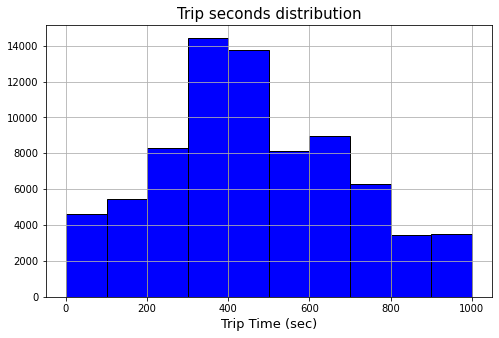

In [3]:
plt.figure(figsize=(8,5))
plt.title("Trip seconds distribution",fontsize=15)
plt.xlabel ("Trip Time (sec)",fontsize=13)
plt.grid(True)
plt.hist(df_in['Trip Seconds'],color='blue',edgecolor='k', bins=10, range=(0,1000))
plt.show()

In [4]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 84131 to 169143
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     100000 non-null  object 
 1   Taxi ID                     99997 non-null   object 
 2   Trip Start Timestamp        100000 non-null  object 
 3   Trip End Timestamp          99999 non-null   object 
 4   Trip Seconds                99987 non-null   float64
 5   Trip Miles                  99998 non-null   float64
 6   Pickup Census Tract         63179 non-null   float64
 7   Dropoff Census Tract        62916 non-null   float64
 8   Pickup Community Area       93234 non-null   float64
 9   Dropoff Community Area      91332 non-null   float64
 10  Fare                        99994 non-null   float64
 11  Tips                        99994 non-null   float64
 12  Tolls                       99994 non-null   float64
 13  Extras    

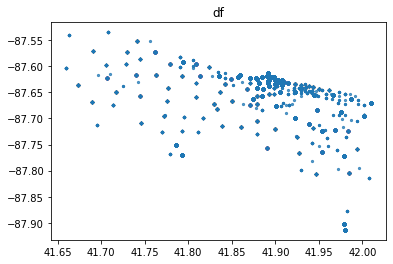

array([[ 41.89960211, -87.63330804],
       [ 41.88498719, -87.62099291],
       [ 41.88099447, -87.63274649],
       ...,
       [ 41.96581197, -87.65587879],
       [ 41.89092203, -87.61886836],
       [ 41.88498719, -87.62099291]])

In [5]:
X = df_in[["Pickup Centroid Latitude","Pickup Centroid Longitude"]].to_numpy()
# X_no_nan = np.where(np.isfinite(X), X, 0)
X_no_nan = X[~np.isnan(X).any(axis=1),:]
plt.scatter(df_in["Pickup Centroid Latitude"],df_in["Pickup Centroid Longitude"], s=5, alpha=0.75)
plt.title('df')
plt.show()
X_no_nan


## Preprocessing data

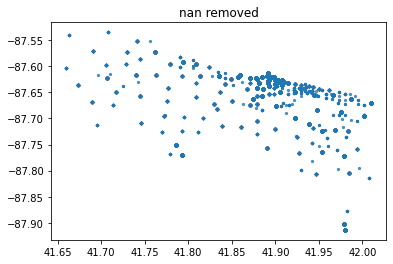

In [6]:
plt.scatter(X_no_nan[:,0],X_no_nan[:,1], s=5, alpha=0.75)
plt.title('nan removed')
plt.show()

In [7]:
scaler = StandardScaler()
x_scaled  = scaler.fit_transform(X_no_nan)
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)
x_normalized

,0,1
0,0.119649,0.992816
1,-0.483127,0.875551
2,-0.704822,0.709384
3,-0.245865,0.969304
4,-0.268747,0.963211
...,...,...
93235,0.988283,-0.152636
93236,0.875968,-0.482370
93237,0.997725,0.067414
93238,-0.268747,0.963211


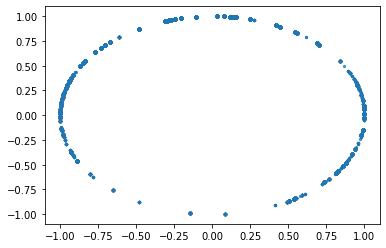

In [8]:
plt.scatter(x_normalized[0],x_normalized[1], s=5, alpha=0.75)
plt.show()

In [9]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns= ['lat','lon']
x_principal.head()

,lat,lon
0,-0.089236,-0.609509
1,-0.447977,-0.111117
2,-0.495624,0.161812
3,-0.339380,-0.341962
4,-0.351873,-0.321847


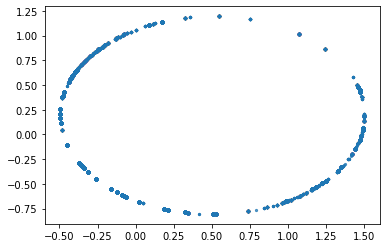

In [10]:
plt.scatter(x_principal['lat'],x_principal['lon'], s=5, alpha=0.75)
plt.show()

In [11]:
db = DBSCAN(eps=0.1, min_samples=5, n_jobs=4)
# db.fit(x_principal)

In [12]:
db.fit(x_principal)
db.labels_

array([0, 1, 2, ..., 7, 3, 1])

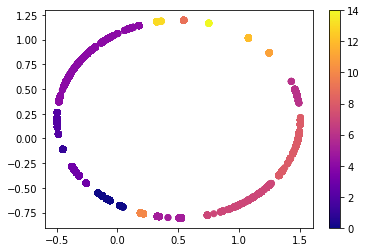

In [13]:
color_clusters = db.fit_predict(x_principal)
plt.scatter(x_principal['lat'], x_principal['lon'], c=color_clusters, cmap='plasma')
plt.colorbar()